## What is important?
- Side placement is equally distributed between left and right -> can probably be removed
- "Plattform og lomme" also applies to busstops in sparsely populated areas -> not a good indicator of importance
- "Signalstopp" is a certain indicator of a busstop in little use: [vegvesenet](https://vegvesen.brage.unit.no/vegvesen-xmlui/bitstream/handle/11250/196092/Hb-232-2008-08.pdf?sequence=5&isAllowed=y)
- "Kun skilt" should be an indicator of low importance: [vegvesenet](https://vegvesen.brage.unit.no/vegvesen-xmlui/bitstream/handle/11250/196092/Hb-232-2008-08.pdf?sequence=5&isAllowed=y) (search for Kun 512)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
busstops = pd.read_csv('../../data/busstops_norway.csv')
busstops['stopplace_type'] = busstops['stopplace_type'].fillna("Mangler type")
busstops.head(5)

,busstop_id,stopplace_type,importance_level,side_placement,geometry
0,853cb081-cc32-4880-aa3e-26e96870d874,Plattform og lomme,Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(6.54064723379766 61.0618887850553)
1,156b052b-2771-497a-b4f4-97fed59e1aca,"Lomme og skilt, ikke plattform",Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(5.89980086113255 60.1421872817075)
2,7312a280-e14f-4b09-a421-02e8fe1bc63e,Mangler type,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781327278563 59.9299988828761)
3,d9cda2c7-355a-49c1-b56c-a33180d2a82e,Mangler type,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781496457324 59.9301044643692)
4,f803bcd3-182d-450b-bbb4-113c6ca885c2,Mangler type,Mangler viktighetsnivå,MIDDLE_RIGHT,POINT(10.7781676444854 59.9302099995898)


In [3]:
busstops["side_placement"].value_counts()

RIGHT             33854
LEFT              32523
MIDDLE              448
MIDDLE_RIGHT         16
MIDDLE_LEFT          14
RIGHT_ACCESS         10
LEFT_AND_RIGHT        8
LEFT_ACCESS           8
Name: side_placement, dtype: int64

In [4]:
t = busstops[["stopplace_type", "importance_level"]]
t2 = t.loc[t['importance_level'].isin(["Lokalt knutepunkt","Regionalt knutepunkt", "Nasjonalt knutepunkt", "Annen viktig holdeplass"])]
t3 = t.loc[t['importance_level'].isin(["Mangler viktighetsnivå", "Standard holdeplass"])]

<AxesSubplot:xlabel='importance_level', ylabel='Count'>

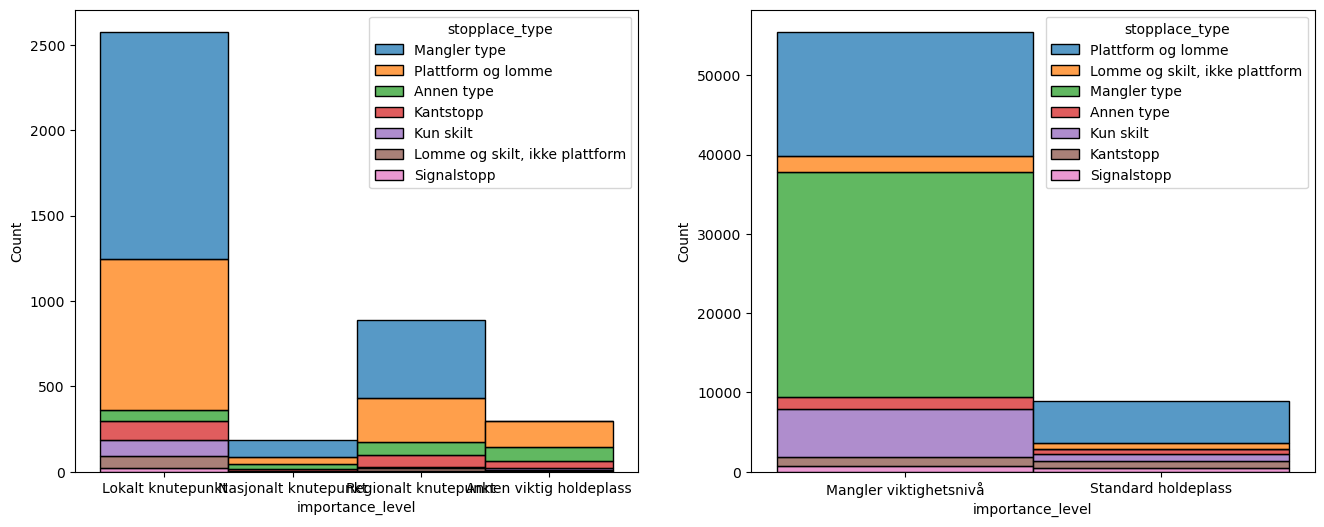

In [5]:
#plt.scatter(t["stopplace_type"], t["importance_level"])
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(ax=axs[0], binwidth=0.3, x="importance_level", hue="stopplace_type", data=t2, stat="count", multiple="stack")
sns.histplot(ax=axs[1], binwidth=0.3, x="importance_level", hue="stopplace_type", data=t3, stat="count", multiple="stack")

## What is done here
All busstops which lacks importance_level and which also have description "Kun skilt" or "Signalstopp" are imputed as "Rural holdeplass".
This is saved to ../../own_data/busstops_norway_imputed_as_rural.csv and can be experimented with to see if it improved performance.

Alternatively, they could be given the label "Standard holdeplass", as this is most likely what they are. Standard holdeplass, however, might not be very useful.

In [8]:
imp_level = busstops["importance_level"].to_numpy()
stop_type = busstops["stopplace_type"].to_numpy()
for i, e in enumerate(imp_level):
    if e == "Mangler viktighetsnivå":
        if stop_type[i] in ["Signalstopp", "Kun skilt"]:
            imp_level[i] = "Rural holdeplass"

In [10]:
busstops1 = busstops.copy()
busstops1["importance_level"] = imp_level
busstops1["importance_level"].value_counts()

Mangler viktighetsnivå     48768
Standard holdeplass         8935
Rural holdeplass            6746
Lokalt knutepunkt           2578
Regionalt knutepunkt         886
Annen viktig holdeplass      299
Nasjonalt knutepunkt         183
Name: importance_level, dtype: int64

In [12]:
busstops1.to_csv("../../own_data/busstops_norway_imputed_as_rural.csv", index=False)

TypeError: to_csv() got an unexpected keyword argument 'save_index'